In [1]:
#Code cell 1
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
#create a pandas dataframe called "training" from the basketball-train.csv file
training = pd.read_csv("Breast_cancer_data.csv")

In [7]:
# Nombrar las columnas
training = training.rename(columns={'mean_radius':'radio_medio','mean_texture':'textura_medio', 'mean_perimeter':'perimetro_medio','mean_area':'area_medica','mean_smoothness':'suavidad_deficiente','diagnosis' : 'diagnostico'})

In [9]:
training.head(5)

,radio_medio,textura_medio,perimetro_medio,area_medica,suavidad_deficiente,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [10]:
# variable objetivo
y=training.diagnostico
x=training.textura_medio

In [11]:
m, b = np.polyfit(x,y,1)

In [12]:
y_mean = y.mean()
x_mean = x.mean()

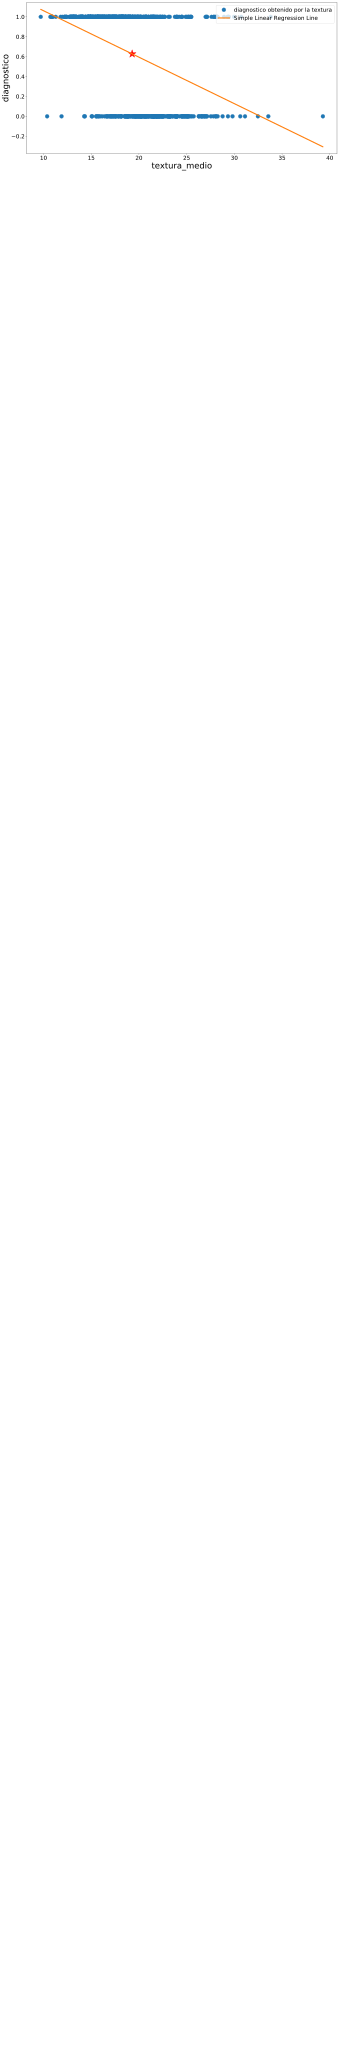

In [13]:
# Reresion Lineal
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(x,y, 'o', markersize = 14, label = "diagnostico obtenido por la textura")
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r")
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)
plt.ylabel('diagnostico', fontsize = 30)
plt.xlabel('textura_medio', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.legend(loc = 'upper right', fontsize = 20)

In [14]:
# Del dataframe total retiramos la variable objetivo (dependiente) para quedarnos con las variables independientes
x_input= training.drop(['diagnostico'], axis=1)

In [15]:
# Separando el conjunto de datos en 2 grupos: entrenamiento (train) y prueba (test)
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x_input,y, test_size=0.20)

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [18]:
# entrenamientos
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Realizar la predicciòn sobre el conjunto de entrenamiento

cancer = model.predict(x_test)

#predictions sobre el train

cancer

array([ 0.97781625,  0.96709507,  0.11546164,  0.83582701,  0.63443751,
        0.9774042 ,  0.63134418,  0.96976778,  0.75234382,  1.35403104,
        1.15648606,  0.31856276,  0.15893938,  0.26176196,  1.14598581,
        0.48542369,  0.20915499,  0.2656103 ,  0.14500317,  0.87321027,
        0.5220087 ,  0.63414468,  0.7552638 ,  0.2836    , -0.20415446,
        0.80352799,  0.75661751,  0.94212758, -0.10212969,  0.59533527,
        0.65703664,  0.76064514,  0.4962725 ,  0.4707805 ,  0.94813378,
        0.85645621,  0.23526578,  0.15889248,  0.64289416,  0.82664719,
        0.16768007,  0.91131098,  0.40917717,  0.14816529,  1.03871476,
        0.65819511, -0.05301377,  0.93573251,  0.35340035, -0.45399103,
        0.9102605 ,  0.68039725,  0.91064062,  1.04197912,  1.03313336,
        0.29312914,  0.48415626,  0.52014036,  0.9371188 ,  0.88218286,
        0.90679193,  0.58332095,  0.87603809,  0.75757125,  0.86888599,
        0.63354439,  0.86625348,  0.4146776 ,  0.24171413,  0.46

In [21]:
x_test

,radio_medio,textura_medio,perimetro_medio,area_medica,suavidad_deficiente
404,12.340,14.95,78.29,469.1,0.08682
522,11.260,19.83,71.30,388.1,0.08511
168,17.470,24.68,116.10,984.6,0.10490
520,9.295,13.90,59.96,257.8,0.13710
377,13.460,28.21,85.89,562.1,0.07517
...,...,...,...,...,...
165,14.970,19.76,95.50,690.2,0.08421
551,11.130,22.44,71.49,378.4,0.09566
164,23.270,22.04,152.10,1686.0,0.08439
254,19.450,19.33,126.50,1169.0,0.10350


In [22]:
#R2
from sklearn.metrics import r2_score

In [23]:
#R
r2_score(y_test,predictions1)

0.6192546079417447